# Customer Segmentation and Analysis 

In [25]:
pip install openpyxl

     ------------------------------------ 250.0/250.0 kB 247.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd

# Replace 'input_file.xls' with the path of your Excel file
input_file_path = 'C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.xlsx'

# Replace 'output_file.csv' with the desired path and name for the CSV file
output_file_path = 'C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_file_path)

# Convert the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"Excel file '{input_file_path}' has been successfully converted to CSV file '{output_file_path}'.")


Excel file 'C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.xlsx' has been successfully converted to CSV file 'C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv'.


Remove the missing and outliers using z-score method

In [31]:
import pandas as pd


# Load the raw data into a pandas DataFrame
raw_data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'raw_data.csv' with the file path of your data

# Handling Missing Values
# Remove rows with missing values
cleaned_data = raw_data.dropna()
# Handling Outliers
# Remove outliers using the z-score method
from scipy.stats import zscore

z_scores = zscore(cleaned_data['CustomerID'])
#this line of code effectively removes outliers from cleaned_data, considering data points with Z-scores beyond the range of -3 to +3 as outliers and excluding them from the resulting cleaned_data.
cleaned_data = cleaned_data[(z_scores < 3) & (z_scores > -3)]
# Save the cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)  # Replace 'cleaned_data.csv' with your desired file path


In [8]:
pip install matplotlib

     ---------------------------------------- 7.5/7.5 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 429.4/429.4 kB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 12.6 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


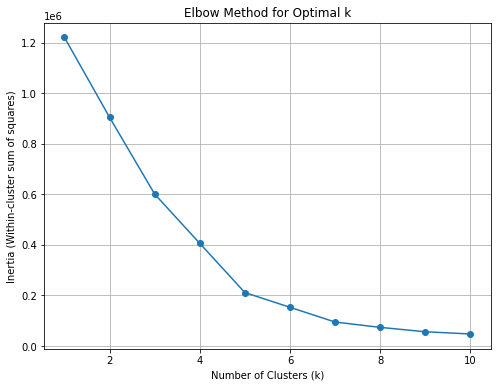

           CustomerID      Quantity     UnitPrice
Cluster                                          
0        16873.024753     11.120971      2.988821
1        13905.689930     13.595304      3.692368
2        14396.000000 -77605.000000      1.560000
3        15098.000000     -1.000000  38970.000000


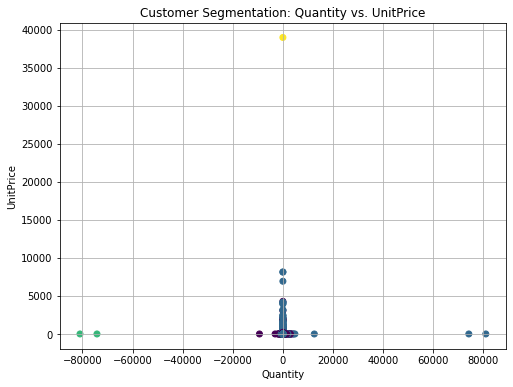

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Select relevant features for clustering (e.g., 'CustomerID', 'Quantity', 'UnitPrice')
selected_features = data[['CustomerID', 'Quantity', 'UnitPrice']]

# Remove rows with missing CustomerID
selected_features = selected_features.dropna(subset=['CustomerID'])

# Standardize the data for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# Based on the Elbow Method, select the optimal number of clusters (e.g., 4)
optimal_k = 4

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
selected_features['Cluster'] = cluster_labels

# Explore the clusters by analyzing the mean values of each cluster
cluster_analysis = selected_features.groupby('Cluster').mean()
print(cluster_analysis)

# Visualize the clusters (e.g., Quantity vs. UnitPrice)
plt.figure(figsize=(8, 6))
plt.scatter(selected_features['Quantity'], selected_features['UnitPrice'], c=cluster_labels, cmap='viridis')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Customer Segmentation: Quantity vs. UnitPrice')
plt.grid()
plt.show()


In [43]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Select relevant features for clustering and customer profiling
selected_features = data[['CustomerID', 'Quantity', 'UnitPrice']]

# Standardize the data for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features[['Quantity', 'UnitPrice']])

# Perform K-means clustering to create customer segments
kmeans = KMeans(n_clusters=4, random_state=42)
selected_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate key metrics for each customer segment
customer_profiles = selected_features.groupby('Cluster').agg({
    'CustomerID': 'count',            # Number of customers in each segment
    'Quantity': 'mean',               # Average quantity purchased by customers in each segment
    'UnitPrice': 'mean',              # Average spending by customers in each segment
})

# Rename the columns for better interpretation
customer_profiles.rename(columns={'CustomerID': 'CustomerCount', 'Quantity': 'AverageQuantity',
                                 'UnitPrice': 'AverageSpending'}, inplace=True)

# Sort the customer profiles by the number of customers in each segment (descending order)
customer_profiles = customer_profiles.sort_values('CustomerCount', ascending=False)

# Display the customer profiles
print(customer_profiles)

# Identify high-value customers in each segment (e.g., customers with above-average spending)
average_spending_by_segment = selected_features.groupby('Cluster')['UnitPrice'].mean()
selected_features['AverageSpendingBySegment'] = selected_features['Cluster'].map(average_spending_by_segment)
high_value_customers = selected_features[selected_features['UnitPrice'] > selected_features['AverageSpendingBySegment']]

# Display the number of high-value customers in each segment
high_value_customers_count = high_value_customers.groupby('Cluster')['CustomerID'].count()
print("\nNumber of High-Value Customers in Each Segment:")
print(high_value_customers_count)


         CustomerCount  AverageQuantity  AverageSpending
Cluster                                                 
0               406824        12.061454         3.364707
1                    2    -77605.000000         1.560000
3                    2     77605.000000         1.560000
2                    1        -1.000000     38970.000000

Number of High-Value Customers in Each Segment:
Cluster
0    109047
1         1
3         1
Name: CustomerID, dtype: int64


<ipython-input-44-70ef4fa419b7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Cluster'] = kmeans.fit_predict(scaled_features)
<ipython-input-44-70ef4fa419b7>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['AverageSpendingBySegment'] = selected_features['Cluster'].map(average_spending_by_segment)


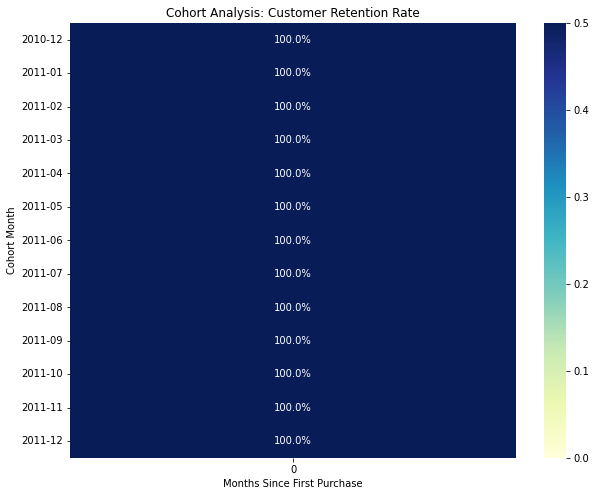

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Convert the 'InvoiceDate' column to a datetime-like value
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract the invoice year-month from InvoiceDate as the cohort month
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

# Group customers into cohorts based on their first purchase month
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# Calculate the number of months since the first purchase for each transaction
data['CohortIndex'] = (data['InvoiceMonth'] - data['CohortMonth']).apply(lambda x: x.n)

# Perform cohort analysis to calculate metrics like retention rate
cohort_data = data.groupby(['CohortMonth', 'CohortIndex']).agg({
    'CustomerID': 'nunique',  # Count of unique customers in each cohort
    'InvoiceNo': 'nunique'    # Count of unique invoices in each cohort
}).reset_index()

# Rename the columns for better interpretation
cohort_data.rename(columns={'CustomerID': 'TotalCustomers', 'InvoiceNo': 'TotalInvoices'}, inplace=True)

# Calculate retention rate for each cohort
initial_customers = cohort_data[cohort_data['CohortIndex'] == 0]['TotalCustomers']
cohort_data['RetentionRate'] = cohort_data['TotalCustomers'] / initial_customers

# Pivot the cohort data to create a heatmap for visualization
cohort_pivot = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='RetentionRate')

# Plot the cohort retention heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_pivot, annot=True, cmap='YlGnBu', fmt='.1%', vmin=0.0, vmax=0.5)
plt.title('Cohort Analysis: Customer Retention Rate')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()


In [52]:
import pandas as pd
import datetime as dt

# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Convert the 'InvoiceDate' column to a datetime-like value
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary value for each customer
current_date = data['InvoiceDate'].max()
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency: days since the last purchase
    'InvoiceNo': 'nunique',                                # Frequency: total number of purchases
    'UnitPrice': 'sum'                                     # Monetary: total spending
}).reset_index()

# Rename the columns for better interpretation
rfm_data.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'}, inplace=True)

# Calculate RFM scores for each customer
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=5, labels=False, duplicates='drop')
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], q=5, labels=False, duplicates='drop')
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], q=5, labels=False, duplicates='drop')

# Calculate RFM score as a combined string
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Identify high-value customers with the highest RFM scores
high_value_customers = rfm_data[rfm_data['RFM_Score'].isin(['444', '543', '544'])]

# Display the high-value customers
print("High-Value Customers:")
print(high_value_customers.head(10))


High-Value Customers:
Empty DataFrame
Columns: [CustomerID, Recency, Frequency, Monetary, R_Score, F_Score, M_Score, RFM_Score]
Index: []


In [53]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Convert the 'InvoiceDate' column to a datetime-like value
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary value for each customer
current_date = data['InvoiceDate'].max()
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency: days since the last purchase
    'InvoiceNo': 'nunique',                                # Frequency: total number of purchases
    'UnitPrice': 'sum'                                     # Monetary: total spending
}).reset_index()

# Rename the columns for better interpretation
rfm_data.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'}, inplace=True)

# Define quantiles for RFM scores
quantiles = rfm_data.quantile(q=[0.2, 0.4, 0.6, 0.8])

# Function to assign RFM scores based on quantiles
def rfm_score(x, p, d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

# Calculate RFM scores for each customer
rfm_data['R_Score'] = rfm_data['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm_data['F_Score'] = rfm_data['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm_data['M_Score'] = rfm_data['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

# Calculate RFM score as a combined string
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Identify high-value customers with the highest RFM scores
high_value_customers = rfm_data[rfm_data['RFM_Score'].isin(['555', '554', '545', '544'])]

# Display the high-value customers
print("High-Value Customers:")
print(high_value_customers.head(10))


High-Value Customers:
      CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
31       12383.0      184          6    309.36        5        4        4   
208      12601.0      189          6    189.81        5        4        4   
414      12868.0      185          6    279.45        5        4        4   
572      13093.0      266         13    583.51        5        5        5   
1020     13715.0      280          8    251.35        5        5        4   
1399     14231.0      178          5    235.28        5        4        4   
1652     14573.0      179         13   1091.49        5        5        5   
1686     14625.0      184          5    285.34        5        4        4   
2014     15079.0      212          5    218.43        5        4        4   
2027     15098.0      181          5  40278.90        5        4        5   

     RFM_Score  
31         544  
208        544  
414        544  
572        555  
1020       554  
1399       544  
1652       

Based on the RFM analysis, we have identified high-value customers who exhibit consistent and substantial purchase behavior. These customers are crucial for the company's revenue and can significantly impact business growth. Here are actionable recommendations for the marketing and sales teams to improve customer engagement, personalized marketing, and loyalty programs:

**Personalized Marketing Campaigns:**
-Utilize the RFM segments to create targeted marketing campaigns for each customer segment. Customize offers, discounts, and promotions based on their purchase behavior.
-Send personalized emails and product recommendations based on each customer's interests and past purchases to increase engagement and drive repeat purchases.

**Loyalty Programs and Incentives:**
-Implement a tiered loyalty program where high-value customers receive exclusive benefits, such as early access to sales, special discounts, or personalized rewards.
-Offer incentives, such as loyalty points or cashback, to encourage repeat purchases and increase customer retention.

**Customer Retention Strategies:**
-Focus on retaining high-value customers by providing exceptional customer service and resolving any issues promptly.
-Create targeted retention offers to win back customers who have shown a decline in frequency or monetary value.

**Cross-selling and Upselling:**
-Use data from high-value customers to identify potential cross-selling and upselling opportunities. 
-Recommend complementary products or higher-priced items based on their purchase history.

**Referral Programs:**
-Encourage high-value customers to refer friends and family to the company by offering referral rewards or discounts. Word-of-mouth referrals from loyal customers can drive new business.

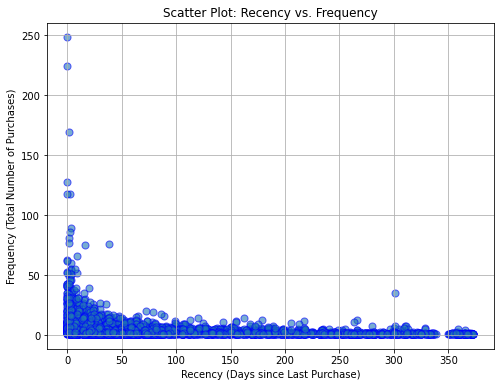

In [54]:


# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Convert the 'InvoiceDate' column to a datetime-like value
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Recency and Frequency for each customer
current_date = data['InvoiceDate'].max()
rf_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency: days since the last purchase
    'InvoiceNo': 'nunique'                                # Frequency: total number of purchases
}).reset_index()

# Rename the columns for better interpretation
rf_data.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'}, inplace=True)

# Create a scatter plot to analyze the relationship between Recency and Frequency
plt.figure(figsize=(8, 6))
plt.scatter(rf_data['Recency'], rf_data['Frequency'], s=50, alpha=0.6, edgecolors='b')
plt.title('Scatter Plot: Recency vs. Frequency')
plt.xlabel('Recency (Days since Last Purchase)')
plt.ylabel('Frequency (Total Number of Purchases)')
plt.grid(True)
plt.show()


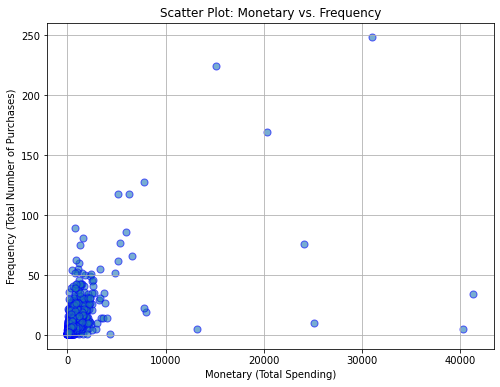

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Calculate Monetary and Frequency for each customer
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',                                # Frequency: total number of purchases
    'UnitPrice': 'sum'                                     # Monetary: total spending
}).reset_index()

# Rename the columns for better interpretation
rfm_data.rename(columns={'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'}, inplace=True)

# Create a scatter plot to analyze the relationship between Monetary and Frequency
plt.figure(figsize=(8, 6))
plt.scatter(rfm_data['Monetary'], rfm_data['Frequency'], s=50, alpha=0.6, edgecolors='b')
plt.title('Scatter Plot: Monetary vs. Frequency')
plt.xlabel('Monetary (Total Spending)')
plt.ylabel('Frequency (Total Number of Purchases)')
plt.grid(True)
plt.show()


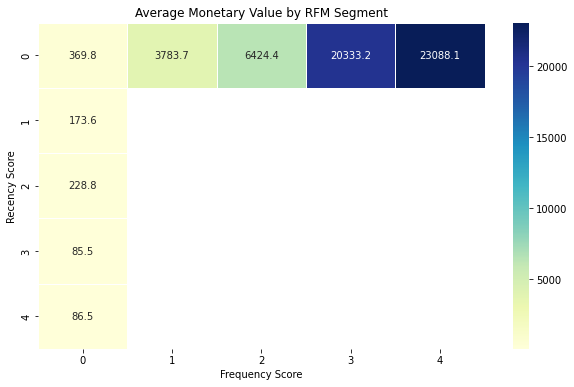

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a pandas DataFrame
data = pd.read_csv('C:/Users/sivkh/OneDrive/Desktop/Project/Online_Retail.csv')  # Replace 'Online Retail.xlsx' with the file path of your data

# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Convert the 'InvoiceDate' column to a datetime-like value
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary value for each customer
current_date = data['InvoiceDate'].max()
rfm_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency: days since the last purchase
    'InvoiceNo': 'nunique',                                # Frequency: total number of purchases
    'UnitPrice': 'sum'                                     # Monetary: total spending
}).reset_index()

# Rename the columns for better interpretation
rfm_data.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'}, inplace=True)

# Calculate RFM scores for each customer
rfm_data['R_Score'] = pd.cut(rfm_data['Recency'], bins=5, labels=False, include_lowest=True)
rfm_data['F_Score'] = pd.cut(rfm_data['Frequency'], bins=5, labels=False, include_lowest=True)
rfm_data['M_Score'] = pd.cut(rfm_data['Monetary'], bins=5, labels=False, include_lowest=True)

# Create RFM_Segment column
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Calculate the average Monetary value for each RFM segment using pivot table
average_monetary_by_segment = rfm_data.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')

# Plot the heatmap for average Monetary value by RFM segment
plt.figure(figsize=(10, 6))
sns.heatmap(average_monetary_by_segment, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Average Monetary Value by RFM Segment')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()


Testing